## Importing Necessary Libraries

In [67]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [68]:
print(os.getcwd())

c:\Users\divya\Desktop\fractal_RBF


In [69]:

df = pd.read_excel("data/Ground Water Level_Wasahermenpet.xlsx")
df.head(10)

,Data Type Code,Data Type Description,Data Time,Data Value,Unit
0,GGZ,GPRS-Water Level,2022-07-06T19:00:00,2430.87,m
1,GGZ,GPRS-Water Level,2022-07-07T19:00:00,2425.00,m
2,GGZ,GPRS-Water Level,2022-07-08T19:00:00,2418.90,m
3,GGZ,GPRS-Water Level,2022-07-09T13:00:00,2413.68,m
4,GGZ,GPRS-Water Level,2022-07-11T20:00:00,2394.55,m
5,GGZ,GPRS-Water Level,2022-07-12T20:00:00,2391.65,m
6,GGZ,GPRS-Water Level,2022-07-13T21:00:00,2387.26,m
7,GGZ,GPRS-Water Level,2022-07-15T21:00:00,2389.00,m
8,GGZ,GPRS-Water Level,2022-07-16T21:00:00,2384.65,m
9,GGZ,GPRS-Water Level,2022-07-17T22:00:00,2381.06,m


In [70]:
df.tail(10)

,Data Type Code,Data Type Description,Data Time,Data Value,Unit
3700,GGZ,GPRS-Water Level,2025-03-01T18:00:00,-2.98,m
3701,GGZ,GPRS-Water Level,2025-03-02T00:00:00,-3.01,m
3702,HGZ,MANUAL-Water Level,2024-05-30T00:00:00,3.70,m
3703,HGZ,MANUAL-Water Level,2024-08-30T00:00:00,4.06,m
3704,HGZ,MANUAL-Water Level,2024-11-30T00:00:00,3.64,m
3705,NaN,NaN,NaN,NaN,NaN
3706,This sheet is downloaded from www.indiawris.go...,NaN,NaN,NaN,NaN
3707,Disclaimer:,NaN,NaN,NaN,NaN
3708,The water and allied data published by Nationa...,NaN,NaN,NaN,NaN
3709,Any further information and clarification rega...,NaN,NaN,NaN,NaN


In [71]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Data Value,3705.0,8.757887,170.883295,-4.61,-4.19,-3.78,-2.76,2430.87


In [72]:
df.isnull().sum()

Data Type Code           1
Data Type Description    5
Data Time                5
Data Value               5
Unit                     5
dtype: int64

## Handelling Null values|

In [73]:
df.dropna(inplace=True)

In [74]:
df.isnull().sum()

Data Type Code           0
Data Type Description    0
Data Time                0
Data Value               0
Unit                     0
dtype: int64

In [75]:
df['Data Time'] = pd.to_datetime(df['Data Time'], errors='coerce').dt.date
df['Data Value'] = df['Data Value'].astype(float)

## Removing all unnecessary colums

In [76]:
df=df[['Data Time','Data Value']]
df

,Data Time,Data Value
0,2022-07-06,2430.87
1,2022-07-07,2425.00
2,2022-07-08,2418.90
3,2022-07-09,2413.68
4,2022-07-11,2394.55
...,...,...
3700,2025-03-01,-2.98
3701,2025-03-02,-3.01
3702,2024-05-30,3.70
3703,2024-08-30,4.06


## Handelling Outliers

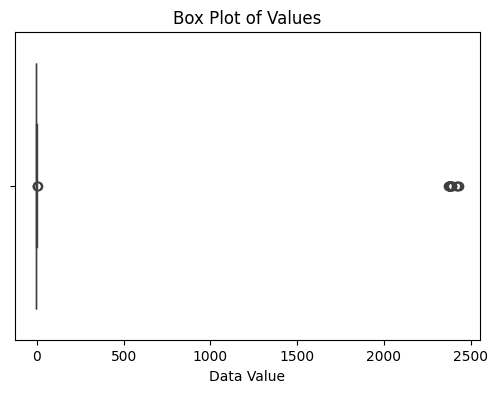

In [77]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Data Value'])
plt.title("Box Plot of Values")
plt.show()

In [78]:
Q1 = df['Data Value'].quantile(0.25)  # 25th percentile
Q3 = df['Data Value'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Data Value'] >= lower_bound) & (df['Data Value'] <= upper_bound)]

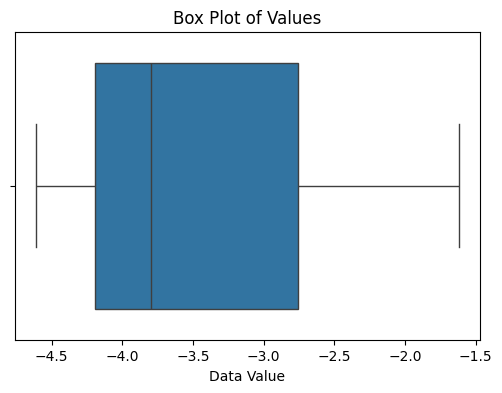

In [79]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Data Value'])
plt.title("Box Plot of Values")
plt.show()

In [80]:
#df['Data Value'] = abs(df['Data Value']);

## Line Plot of the data

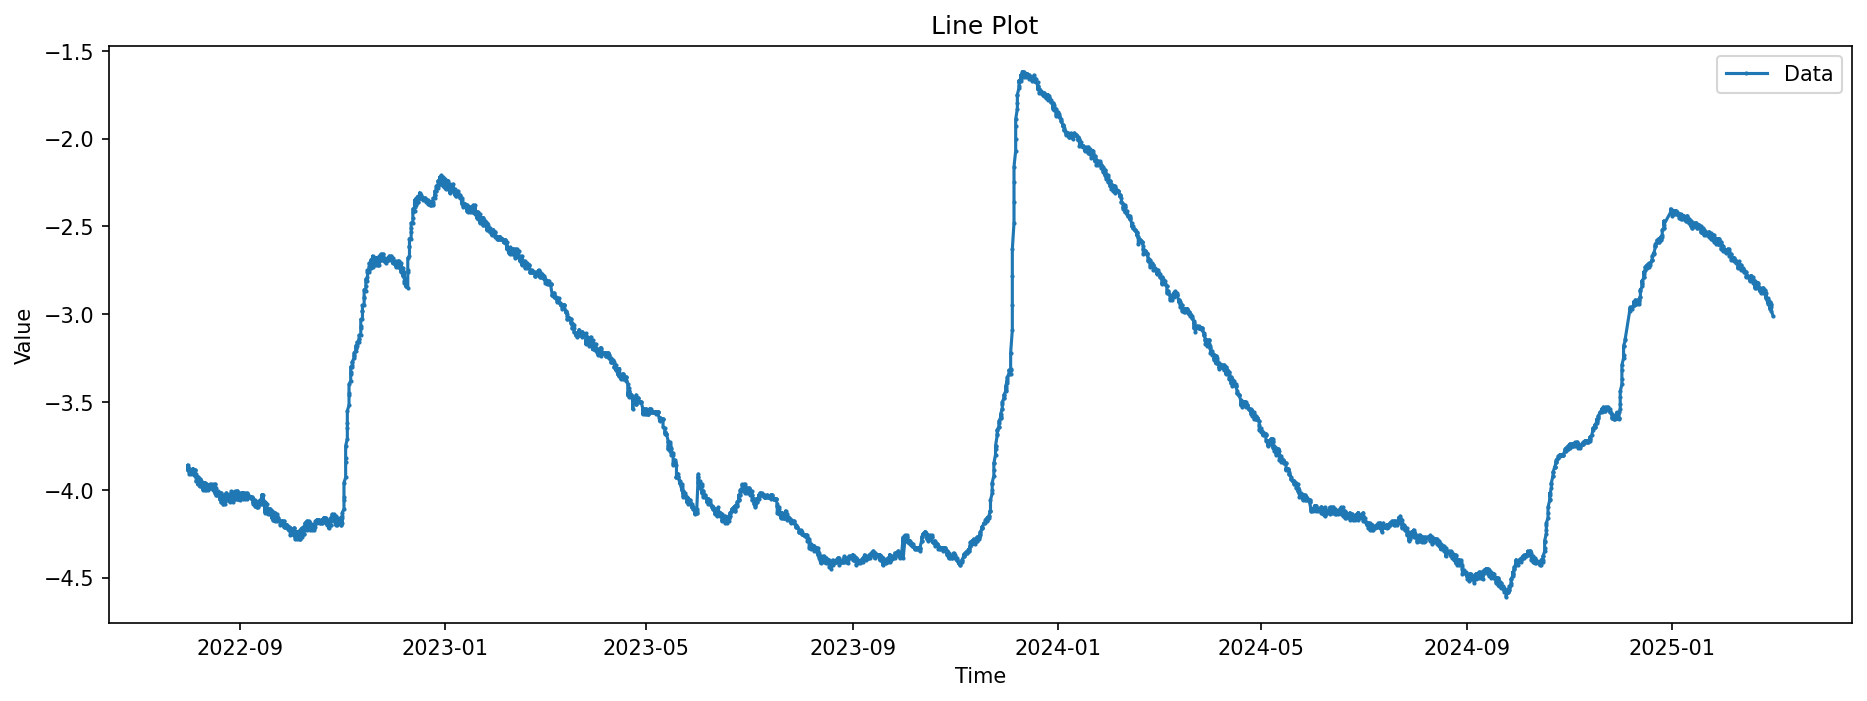

In [81]:
plt.figure(figsize=(15, 5),dpi=150)

plt.plot(df["Data Time"], df['Data Value'], marker='o', markersize=1, linestyle='-', label="Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title(" Line Plot")
plt.legend()
plt.show()

In [197]:
window_size = 10
label_offset = 15  # Change this to select how far ahead the label should be

# Create input (X) and output (y) using rolling windows
X, y = [], []
for i in range(len(df) - window_size - label_offset + 1):
    X.append(df['Data Value'].iloc[i:i+window_size].values)  # Past 'window_size' values
    y.append(df['Data Value'].iloc[i+window_size+label_offset-1])  # Future value as target

# Convert to NumPy arrays
X, y = np.array(X), np.array(y)
print("Input (X):\n", X)
print("Output (y):\n", y)

Input (X):
 [[-3.87 -3.86 -3.89 ... -3.91 -3.89 -3.89]
 [-3.86 -3.89 -3.88 ... -3.89 -3.89 -3.9 ]
 [-3.89 -3.88 -3.88 ... -3.89 -3.9  -3.89]
 ...
 [-2.87 -2.86 -2.88 ... -2.87 -2.88 -2.88]
 [-2.86 -2.88 -2.87 ... -2.88 -2.88 -2.86]
 [-2.88 -2.87 -2.88 ... -2.88 -2.86 -2.91]]
Output (y):
 [-3.89 -3.92 -3.92 ... -2.95 -2.98 -3.01]


In [198]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Creating RBF Neural Network

In [199]:
from sklearn.metrics import mean_squared_error

def gaussian_rbf(x, c, gamma):
    return np.exp(-gamma * np.linalg.norm(x - c, axis=1) ** 2)

class RBFNetwork:
    def __init__(self, num_rbf_neurons, gamma):
        self.num_rbf_neurons = num_rbf_neurons
        self.gamma = gamma
        self.centers = None
        self.weights = None

    def _compute_activations(self, X):
        G = np.zeros((X.shape[0], self.num_rbf_neurons))
        for i, x in enumerate(X):
            G[i, :] = gaussian_rbf(x, self.centers, self.gamma)
        return G

    def fit(self, X, y, lr=0.01, epochs=200):
        y = y.ravel()
        np.random.seed(1)
        indices = np.random.choice(X.shape[0], self.num_rbf_neurons, replace=False)
        self.centers = X[indices].copy()
        self.weights = np.random.randn(self.num_rbf_neurons)

        for epoch in range(epochs):
            G = self._compute_activations(X)
            y_pred = G @ self.weights
            error = y_pred - y
            loss = np.mean(error ** 2)

            grad_w = G.T @ error / len(y)
            self.weights -= lr * grad_w
            for j in range(self.num_rbf_neurons):
                diff = X - self.centers[j]
                influence = error * self.weights[j] * G[:, j] * 2 * self.gamma
                grad_cj = np.dot(influence, diff) / len(y)
                self.centers[j] -= lr * grad_cj

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, MSE Loss: {loss:.4f}")

    def predict(self, X):
        G = self._compute_activations(X)
        return G @ self.weights

In [200]:
num_rbf_neurons = 96
gamma = 0.5
learning_rate = 0.2
epochs = 200

In [201]:
rbf_model = RBFNetwork(num_rbf_neurons=num_rbf_neurons, gamma=gamma)
rbf_model.fit(X_train_scaled, y_train, lr=learning_rate, epochs=epochs)
centers_learned = rbf_model.centers.copy()
weights_learned = rbf_model.weights.copy()
y_test_pred = rbf_model.predict(X_test_scaled)

Epoch 0, MSE Loss: 92.5022
Epoch 10, MSE Loss: 0.1447
Epoch 20, MSE Loss: 0.0711
Epoch 30, MSE Loss: 0.0536
Epoch 40, MSE Loss: 0.0436
Epoch 50, MSE Loss: 0.0369
Epoch 60, MSE Loss: 0.0321
Epoch 70, MSE Loss: 0.0286
Epoch 80, MSE Loss: 0.0259
Epoch 90, MSE Loss: 0.0239
Epoch 100, MSE Loss: 0.0223
Epoch 110, MSE Loss: 0.0211
Epoch 120, MSE Loss: 0.0201
Epoch 130, MSE Loss: 0.0194
Epoch 140, MSE Loss: 0.0187
Epoch 150, MSE Loss: 0.0182
Epoch 160, MSE Loss: 0.0177
Epoch 170, MSE Loss: 0.0174
Epoch 180, MSE Loss: 0.0170
Epoch 190, MSE Loss: 0.0168


## Fractalizing RBF function

In [202]:
def compute_k_from_centers(pts):
    dists = np.linalg.norm(pts[:, None] - pts[None, :], axis=2)
    return np.max(dists)

def norm_rbf(x, c, gamma):
  return np.exp(-gamma*np.linalg.norm(x-c, ord=2))

def rbf(x):
  return np.exp(-(x**2))

def base(x):
  return ((rbf(k)-rbf(0))/k)*x + rbf(0)
k = compute_k_from_centers(X_train_scaled )



In [203]:
k = compute_k_from_centers(X_train_scaled )
abs = np.linspace(0,k,5)
a=np.zeros(len(abs)-1)
b=np.zeros(len(abs)-1)

alpha = np.array([0.5,-0.2,0,0.5])
for n in range (0,len(abs)-1):
  a[n]=(abs[n+1]-abs[n])/(abs[len(abs)-1]-abs[0])
  b[n]=(abs[n]*abs[len(abs)-1]-abs[n+1]*abs[0])/(abs[len(abs)-1]-abs[0])

q = [None for _ in range(len(abs)-1)]
for i in range(len(abs)-1):
    def qi(i):
        return lambda t: rbf(a[i]*t + b[i]) - alpha[i] * (base(t)) * rbf(t)
    q[i] = qi(i)

vecs = [np.array([[a[i], 0], [0, alpha[i]]]) for i in range(len(abs)-1)]
Wn = [None for _ in range(len(abs)-1)]
for i in range(len(abs)-1):
    def make_w(i):
        return lambda t, x, i=i: vecs[i] @ np.array([t, x]) + np.array([b[i], q[i](t)])
    Wn[i] = make_w(i)
iterations = 7
initial_point = np.array((0, 0))
points = [initial_point]

for _ in range(iterations):
    new_points = []
    for p in points:
        for w in Wn:
            new_points.append(w(p[0], p[1]))
    points = new_points

points_array = np.array(points)
from scipy.interpolate import interp1d
points_sorted = sorted(points, key=lambda p: p[0])
ts = np.array([p[0] for p in points_sorted])
fs = np.array([p[1] for p in points_sorted])

f_alpha = interp1d(ts, fs, kind='linear', fill_value='extrapolate')

def phi_alpha(x, gamma=1.0):
    r = np.linalg.norm(x, ord=2)
    return f_alpha(np.sqrt(gamma) * r)

## Creating RBF fractal neural network

In [204]:
def fractal_rbf(x, centers, gamma=1.0):
    return np.array([phi_alpha(x - c, gamma) for c in centers])
class FractalRBFNetwork(RBFNetwork):
    def __init__(self, num_rbf_neurons, gamma):
        super().__init__(num_rbf_neurons, gamma)

    def _compute_activations(self, X):
        G = np.zeros((X.shape[0], self.num_rbf_neurons))
        for i, x in enumerate(X):
            G[i, :] = fractal_rbf(x, self.centers, self.gamma)
        return G

In [205]:
# ---------- Use Fractal RBF (no training) ----------
fractal_model = FractalRBFNetwork(num_rbf_neurons=num_rbf_neurons, gamma=gamma)
fractal_model.centers = centers_learned.copy()
fractal_model.weights = weights_learned.copy()

# Predict using fractal phi_alpha kernel
y_test_pred_fractal = fractal_model.predict(X_test_scaled)

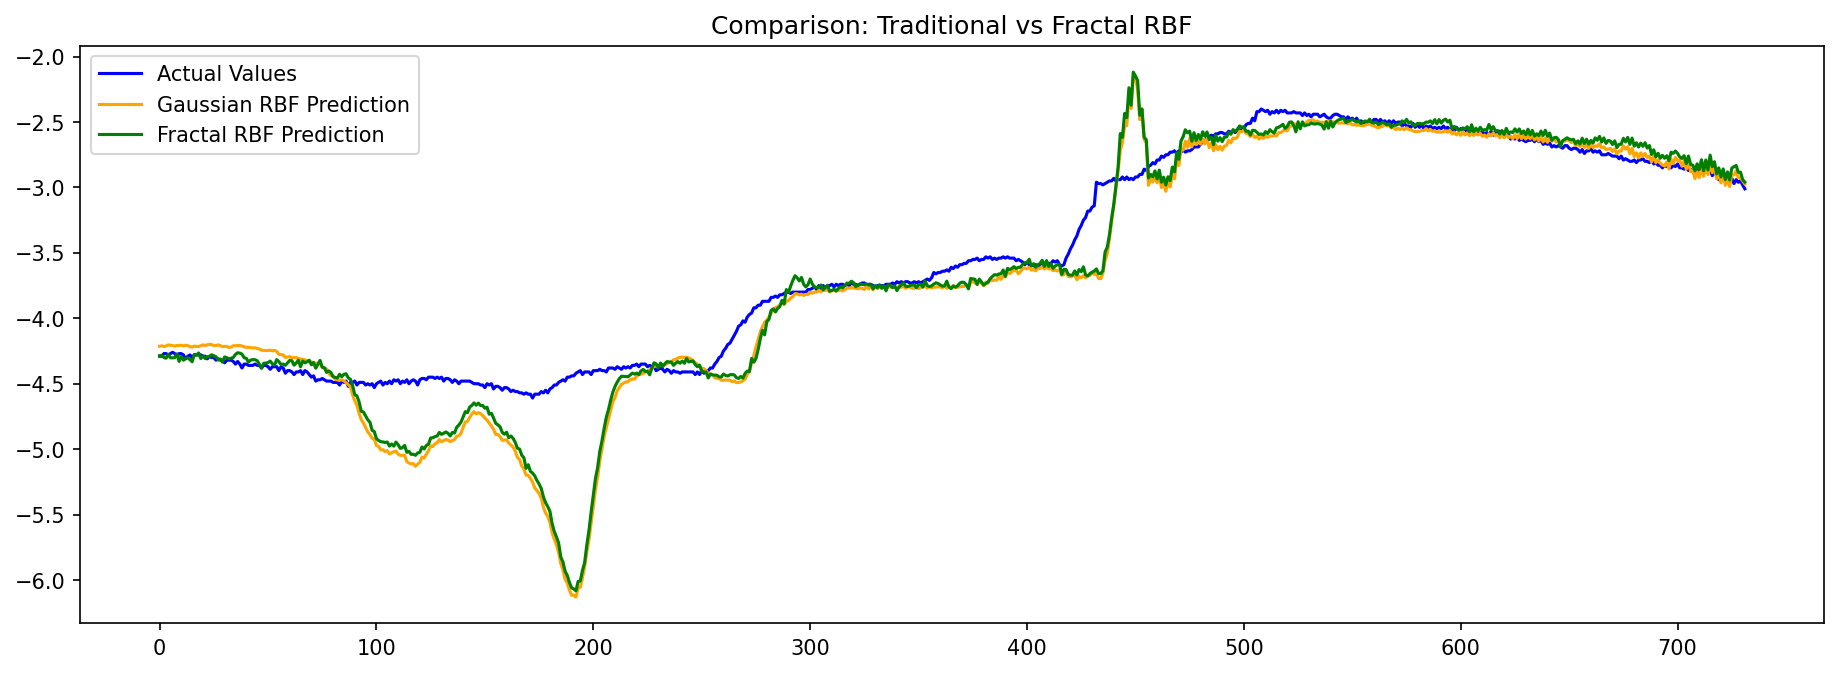

Test MSE (Traditional Gaussian RBF): 0.1140
Test MSE (Fractalized RBF with same weights & centers): 0.0997


In [206]:
# ---------- Plot Results ----------
plt.figure(figsize=(15, 5),dpi=150)
plt.plot(y_test, label="Actual Values", color='blue')
plt.plot(y_test_pred, label="Gaussian RBF Prediction", color='orange')
plt.plot(y_test_pred_fractal, label="Fractal RBF Prediction", color='green')
plt.title("Comparison: Traditional vs Fractal RBF")
plt.legend()
plt.show()

# ---------- Evaluate ----------
mse_traditional = mean_squared_error(y_test, y_test_pred)
mse_fractal = mean_squared_error(y_test, y_test_pred_fractal)

print(f"Test MSE (Traditional Gaussian RBF): {mse_traditional:.4f}")
print(f"Test MSE (Fractalized RBF with same weights & centers): {mse_fractal:.4f}")